In [ ]:
# command for showing slideshow

~ jupyter nbconvert {RELATIVE_PATH_TO_THIS_FILE} --to slides --post serve

## Imports

In [973]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [974]:
PATH = "2017/Student Feedback Surveys-Superview.csv" 

df = pd.read_csv(PATH)

df.head(5)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


## Data sanitisation for "Rating (Num)"

In [975]:
# Type of input rating?
df_test = df["Rating (Num)"][0]
print(type(df_test))


<class 'str'>


In [976]:
# bad data discovered!
ls_bad_data = df["Rating (Num)"].unique()

ls_bad_data

array(['3', '4', '5', '6', '7', '8', '9', '10', '0', '1', '2', '#ERROR!'],
      dtype=object)

In [977]:
# Find all non bad data from "Rating (Nums)" column
ARG_NOT_BAD_ENTRY = (df["Rating (Num)"] != "#ERROR!")

# Update dataframe to remove all bad entries in "Rating (Nums)" column
df = df[ARG_NOT_BAD_ENTRY]

In [978]:
# overrite existing column (cast all Ratings to ints)
df["Rating (Num)"] = df["Rating (Num)"].astype(int)

for i in df["Rating (Num)"][:5]:
    print(type(i))
 

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>


- **Map**: Iterates over data and returns same-size data with function applied to each element.
    - EX: Map over data to multiply each entry in data by 5. 
- **Filter**: Iterates over data and returns subset of data with some filtering function applied to each element.
    - EX: Filter over data to return data within range (0, 10).
- **Reduce**: Iterates over data and returns single object with some accumulative reducing function applied to each element.
    - EX: Reduce all data to sum all entries in dataset.

In [979]:
# change all elements of series/df column based on some arg --> BAD
# iterably filter elements based on logical expression/arg --> GOOD

## Create seperate dataframes categorised by "Rating"

In [980]:
# Add new column NPS_type for tag
def filter_nps(item):
    if item > 0 and item <= 6:
        return "Detractor"
    if item > 6 and item <= 8:
        return "Passive"
    if item > 8 and item <= 10:
        return "Promoter"
    
df_rating = df["Rating (Num)"]

# using .apply to pass filter_nps as an iterable for all elements of "Rating (Num)" series.
df["NPS_Type"] = df_rating.apply(filter_nps)

In [981]:
df.head(3)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor


In [982]:
ARG_DETRACTORS = (df["NPS_Type"] == "Detractor")


df_detractors = df[ARG_DETRACTORS]


df_detractors.head(2)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor


In [983]:
ARG_PASSIVE = (df["NPS_Type"] == "Passive")

df_passive = df[ARG_PASSIVE]

df_passive.head(2)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type
44,20,Redwood City,Apps,Week 1,7,A little too slow,Passive
45,26,Los Angeles,Apps,Week 1,7,A little too fast,Passive


In [984]:
ARG_PROMOTER = (df["NPS_Type"] == "Promoter")

df_promoter = df[ARG_PROMOTER]

df_promoter.head(2)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type
256,11,Atlanta,"Apps, Explorer",Week 1,9,Just right,Promoter
257,15,Redwood City,Apps,Week 1,9,Just right,Promoter


## Net Promoter Score 

In [985]:
# NPS = (Promoters - Detractors)  (Promoters + Passives + Detractors)

ARG_NPS =(len(df_promoter) - len(df_detractors)) / (len(df_detractors) + len(df_passive) + len(df_promoter))

NPS_SCORE = ARG_NPS * 100

NPS_SCORE

44.267955801104975

# Question 1: How does MS increase its NPS?
## If Make School wanted better "word of mouth" from its former summer academy students, what could they do to improve? What influences sentiment the most? 
- Perhaps its how the students found the "Schedule Pacing"?
- Lets look at the Distribution of "Schedule Pacing" for "NPS_Type"

### Correlation Plot for Correlating `Schedule Pacing` and `NPS_Type`

### Dicts for correlation by value (can't logically evaluate strings!) 

In [986]:
DATA_DICT_NPS_TYPE = {
    "Detractor": -1,
    "Passive": 0,
    "Promoter": 1
}

DATA_DICT_PACING = {
    "Way too slow": 1,
    "A little too slow": 2,
    "Just right": 3,
    "A little too fast": 4,
    "Way too fast": 5
}

### Mappings to add new columns

In [987]:
df["NPS_Type_Encoded"] = df["NPS_Type"].map(DATA_DICT_NPS_TYPE)
df["Schedule_Pacing_Encoded"] = df["Schedule Pacing"].map(DATA_DICT_PACING)

### Plotting `Schedule Pacing` per `NPS_Type`

In [988]:
def plot_pacing_category_across_all_nps_types(pacing="Just right"):
    """ Function to plot all three pacing types proportionally. """
    pacing_nps_arr = [
        len(df_promoter[df_promoter["Schedule Pacing"] == pacing]) / len(df_promoter),           # Promoters
        len(df_passive[df_passive["Schedule Pacing"] == pacing]) / len(df_passive),              # Passives
        len(df_detractors[df_detractors["Schedule Pacing"] == pacing]) / len(df_detractors),     # Detractors
    ]
    return pacing_nps_arr

In [989]:
pacings = list(DATA_DICT_PACING.keys())

def plot_each_nps_type_schedule():
    X_data = np.arange(3)
    plt.figure(figsize=(15,15))
    for pacing in pacings:
        plt.plot(X_data, plot_pacing_category_across_all_nps_types(pacing))
    plt.xticks(X_data, labels)
    plt.legend(pacings)
    plt.title("Relationship Plot for All NPS Types Across All Pacings (x=NPS_Type, y=Percentage)")
    plt.show()

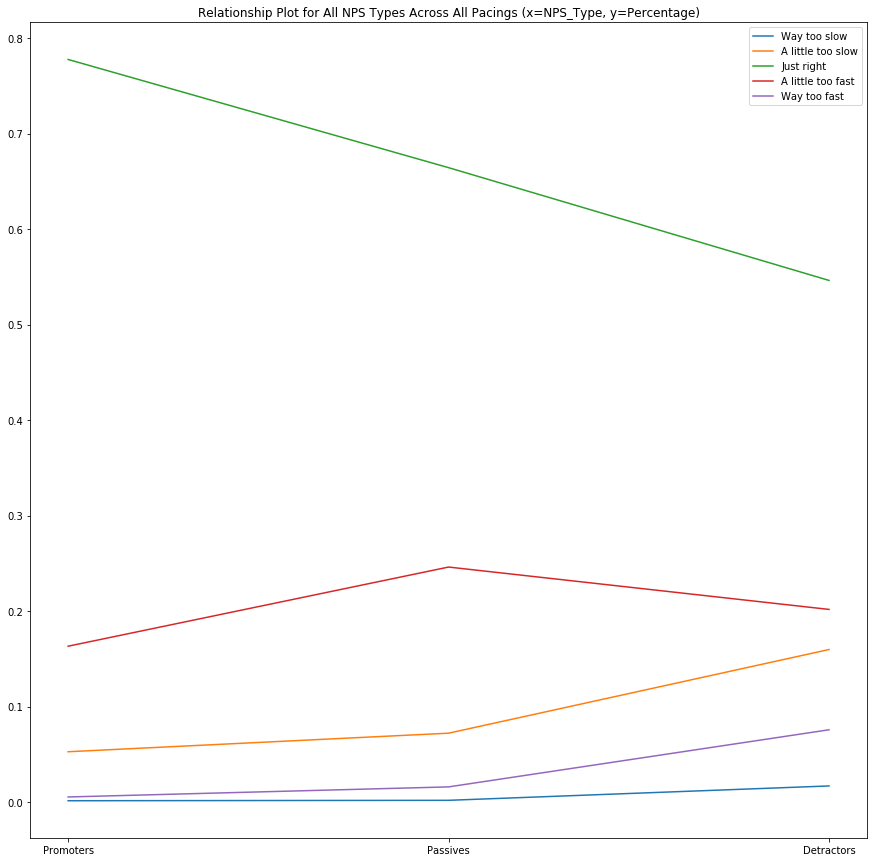

In [990]:
plot_each_nps_type_schedule()

### -- Confirming some values --

#### Percentage of "Just right" for Promoters

In [991]:
ARG_JUST_RIGHT = (df_promoter["Schedule Pacing"] == "Just right")
ARG_JUST_RIGHT_PERCENTAGE = (len(df_promoter[ARG_JUST_RIGHT]) / len(df_promoter)) * 100
ARG_JUST_RIGHT_PERCENTAGE

77.76315789473685

#### Percentage of "A little too fast" for Promoters

In [992]:
ARG_LITTLE_FAST = (df_promoter["Schedule Pacing"] == "A little too fast")
ARG_LITTLE_FAST_PERCENTAGE = (len(df_promoter[ARG_LITTLE_FAST]) / len(df_promoter)) * 100
ARG_LITTLE_FAST_PERCENTAGE

16.315789473684212

## Findings
- TRENDS: 
    - x="Way too slow" -> seems to be a slight trend of x increasing in frequency as "Rating" decreases.
    - x="A little too slow" -> similar trend.
    - x="Just right" -> seems to be a clear trend of x decreasing in frequency as "Rating" decreases.
    - x="A little too fast" -> seems to be a slight trend of x increasing in frequency as "Rating" decreases.
    - x="Way too fast" -> similar trend.
    - **Overall, x variables follow a trend I expected but thought they would be more pronounced. This tells me that "Schedule Pacing" *alone* does not have much of an impact of what NPS_Type you are**
    - **"Just right" is the hightest proportion accross all NPS_Types, if it were the biggest contributing factor to NPS_Type the line should be much steeper.**

# Question2 : 
## If Schedule Pacing doesnt really influence NPS_Type, maybe the "Track" does?

## Data Sanitisation for "Track"

In [993]:
df["Track"].unique()

array(['Apps, Explorer', 'Apps', 'Games', nan, 'VR', 'Games, Explorer'],
      dtype=object)

In [1010]:
# df['Track'] = df['Track'].apply(lambda x: np.nan if type(x) is float else x)
# for i in df["Track"].dropna().values:
#     print(type(i))
#     print(df["Track"].dropna().values)

# Remove NaN's from all columns
df = df.dropna()
df["Track"].unique()

array(['Apps, Explorer', 'Apps', 'Games', 'VR', 'Games, Explorer'],
      dtype=object)

## Dataframes by Track

In [996]:
ARG_APPS = (df["Track"] == "Apps")
df_apps = df[ARG_APPS]
df_apps.head(2)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type,NPS_Type_Encoded,Schedule_Pacing_Encoded
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor,-1.0,4
5,23,Redwood City,Apps,Week 1,5,Just right,Detractor,-1.0,3


In [997]:
ARG_APPS_EXP = (df["Track"] == "Apps, Explorer")
df_apps_exp = df[ARG_APPS_EXP]
df_apps_exp.head(2)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type,NPS_Type_Encoded,Schedule_Pacing_Encoded
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor,-1.0,3
4,350,New York City,"Apps, Explorer",Week 1,4,Just right,Detractor,-1.0,3


In [998]:
ARG_GAMES = (df["Track"] == "Games")
df_games = df[ARG_GAMES]
df_games.head(2)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type,NPS_Type_Encoded,Schedule_Pacing_Encoded
2,117,San Francisco,Games,Week 1,4,Way too slow,Detractor,-1.0,1
20,37,Los Angeles,Games,Week 1,6,Just right,Detractor,-1.0,3


In [999]:
ARG_VR = (df["Track"] == "VR")
df_vr = df[ARG_VR]
df_vr.head(2)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type,NPS_Type_Encoded,Schedule_Pacing_Encoded
48,48,San Francisco,VR,Week 1,7,A little too slow,Passive,0.0,2
109,53,San Francisco,VR,Week 1,8,Just right,Passive,0.0,3


In [1000]:
ARG_GAMES_EXP = (df["Track"] == "Games, Explorer")
df_games_exp = df[ARG_GAMES_EXP]
df_games_exp.head(2)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type,NPS_Type_Encoded,Schedule_Pacing_Encoded
198,333,New York City,"Games, Explorer",Week 1,8,Just right,Passive,0.0,3
211,366,New York City,"Games, Explorer",Week 1,8,Just right,Passive,0.0,3


### Correlation Plot for Correlating `Track` and `NPS_Type`

In [1001]:
DATA_DICT_TRACK = {
    "Apps": 1,
    "Apps, Explorer": 2,
    "Games": 3,
    "Games, Explorer": 4,
    "VR": 5
}

In [1002]:
df["Track_Encoded"] = df["Track"].map(DATA_DICT_TRACK)
df.head(2)

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS_Type,NPS_Type_Encoded,Schedule_Pacing_Encoded,Track_Encoded
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right,Detractor,-1.0,3,2
1,36,Los Angeles,Apps,Week 1,4,A little too fast,Detractor,-1.0,4,1


In [1003]:
df_promoter["Track"].unique()

array(['Apps, Explorer', 'Apps', 'Games', 'VR', 'Games, Explorer', nan],
      dtype=object)

In [1004]:
def plot_track_category_across_all_nps_types(track="Apps"):
    """ Function to plot all three pacing types proportionally. """
    track_nps_arr = [
        len(df_promoter[df_promoter["Track"] == track]) / len(df_promoter),           # Promoters
        len(df_passive[df_passive["Track"] == track]) / len(df_passive),              # Passives
        len(df_detractors[df_detractors["Track"] == track]) / len(df_detractors),     # Detractors
    ]
    return track_nps_arr

In [1005]:
tracks

['Apps', 'Apps, Explorer', 'Games', 'Games, Explorer', 'VR']

In [1016]:
tracks = list(DATA_DICT_TRACK.keys())
# tracks = ["Games", "Games, Explorer", "VR"]

def plot_each_nps_type_track():
    X_data = np.arange(3)
    plt.figure(figsize=(15,15))
    for track in tracks:
        plt.plot(X_data, plot_track_category_across_all_nps_types(track))
    plt.xticks(X_data, labels)
    plt.legend(tracks)
    plt.title("Relationship Plot for All NPS Types Across All Tracks (x=NPS_Type, y=Percentage)")
    plt.show()

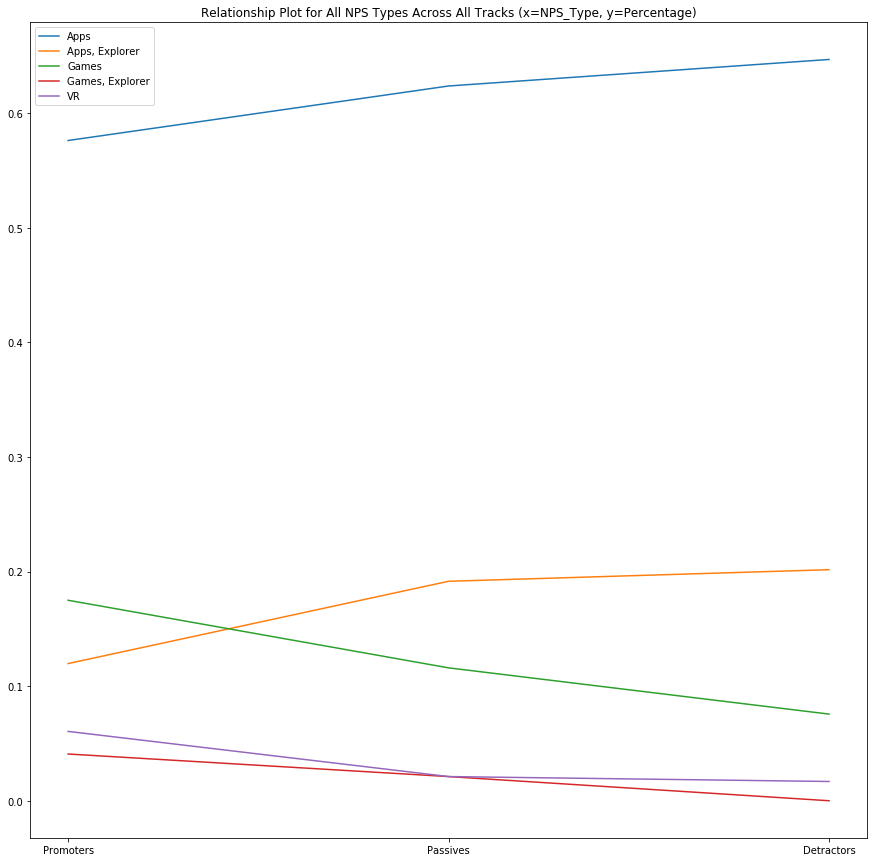

In [1017]:
plot_each_nps_type_track()

## Findings
- TRENDS: 
    - x="Apps" -> seems to be a slight trend of x increasing in frequency as "Rating" decreases.
    - x="Apps, Explorer" -> similar trend.
    - x="Games" -> seems to be a clear trend of x decreasing in frequency as "Rating" decreases.
    - x="Games, Explorer" -> similar trend.
    - x="VR" -> similar trend. 
    - **Overall:**
        - **The tracks of Games, Games Explorer & VR seem to have a positive influence on NPS_Type.**
        - **Apps, Apps Explorer seem to have a negative influence on NPS_Type.**
        
        - Apps, Apps Explrorer make up 77.86% of total summer academy body and they make up the biggest proportion of Detractors (but they also make up the biggest proportion of Passives and Promoters)
        - An increase in NPS score will most likely be a result of some influence over these two tracks.
        - **Apps & Apps, Explorer tracks skew data if only looked at proportionally**

In [1008]:
# Percentage of Apps & Apps, Explorer
len_apps = len(df_apps)
len_apps_exp = len(df_apps_exp)
len_all = len(df)

((len_apps + len_apps_exp) / len_all) * 100

77.86476868327402

## Further Investigation:
    - I only investigated with *relative* correlations, will the same trends occur with *absolute* values?
    - I can't confidently answer questions 1 & 2 without a look at absolute numbers.